In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
patient_df=pd.read_csv('../pcms_hackathon_data/train/patient.csv')

In [3]:
patient_df.columns

Index(['patient_id', 'age', 'hot_spotter_identified_at',
       'hot_spotter_readmission_flag', 'hot_spotter_chronic_flag'],
      dtype='object')

In [4]:
patient_df.head(3)

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
0,291,56,2025-03-01,f,f
1,306,42,0001-01-01,f,f
2,310,71,2025-03-01,f,f


In [5]:
patient_df.shape

(8000, 5)

In [6]:
patient_df.isnull().sum()

patient_id                      0
age                             0
hot_spotter_identified_at       0
hot_spotter_readmission_flag    0
hot_spotter_chronic_flag        0
dtype: int64

In [7]:
patient_df.isnull().sum()

patient_id                      0
age                             0
hot_spotter_identified_at       0
hot_spotter_readmission_flag    0
hot_spotter_chronic_flag        0
dtype: int64

In [8]:
patient_df['hot_spotter_readmission_flag'] = (patient_df['hot_spotter_readmission_flag'] == 't').astype(int)
patient_df['hot_spotter_chronic_flag'] = (patient_df['hot_spotter_chronic_flag'] == 't').astype(int)


In [9]:
patient_df.head()

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
0,291,56,2025-03-01,0,0
1,306,42,0001-01-01,0,0
2,310,71,2025-03-01,0,0
3,315,49,0001-01-01,0,0
4,318,25,0001-01-01,0,0


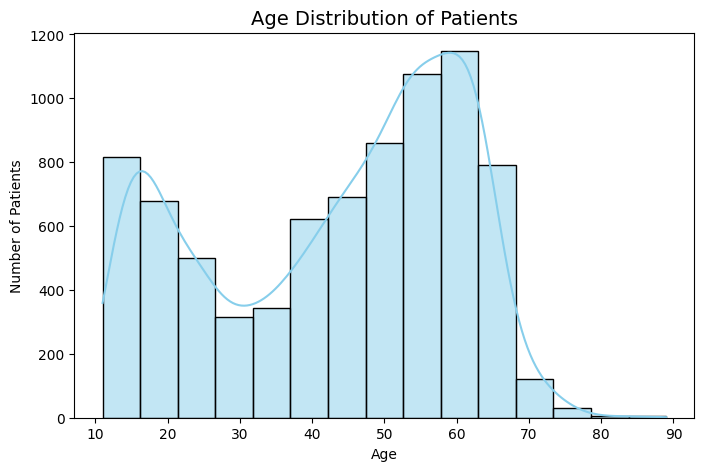

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(patient_df['age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Patients', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()


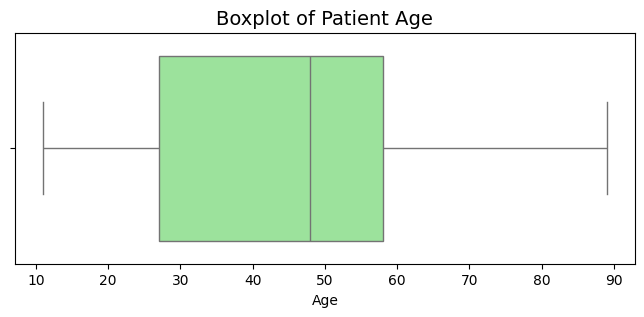

In [11]:
plt.figure(figsize=(8,3))
sns.boxplot(x=patient_df['age'], color='lightgreen')
plt.title('Boxplot of Patient Age', fontsize=14)
plt.xlabel('Age')
plt.show()


In [12]:
patient_df.hot_spotter_chronic_flag.value_counts()

hot_spotter_chronic_flag
0    7869
1     131
Name: count, dtype: int64

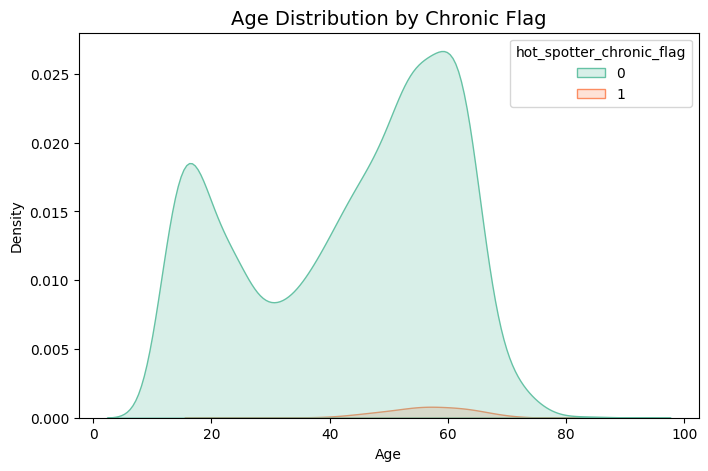

In [13]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=patient_df, x='age', hue='hot_spotter_chronic_flag', fill=True, palette='Set2')
plt.title('Age Distribution by Chronic Flag', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


In [14]:
patient_df.hot_spotter_readmission_flag.value_counts()

hot_spotter_readmission_flag
0    7997
1       3
Name: count, dtype: int64

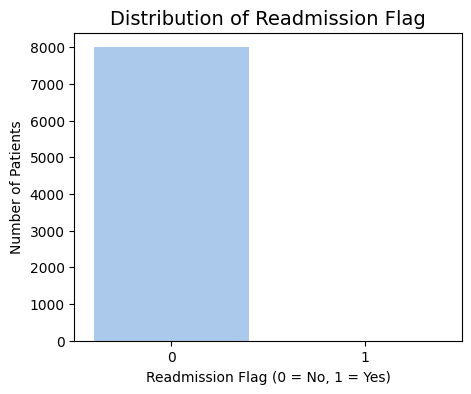

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x='hot_spotter_readmission_flag', data=patient_df, palette='pastel')
plt.title('Distribution of Readmission Flag', fontsize=14)
plt.xlabel('Readmission Flag (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()


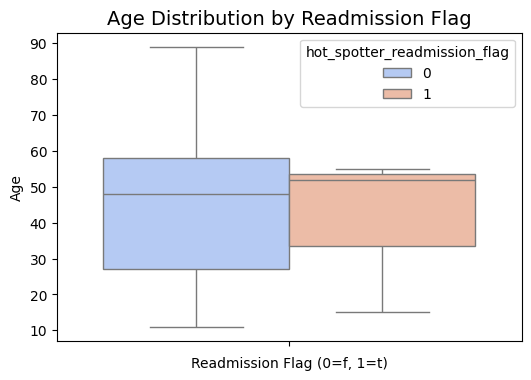

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(hue='hot_spotter_readmission_flag', y='age', data=patient_df, palette='coolwarm')
plt.title('Age Distribution by Readmission Flag', fontsize=14)
plt.xlabel('Readmission Flag (0=f, 1=t)')
plt.ylabel('Age')
plt.show()


In [17]:
patient_df['readmission_risk'] = patient_df['hot_spotter_readmission_flag'].astype(float)


In [18]:
import pandas as pd
import numpy as np

patient_df['hot_spotter_readmission_flag'] = (patient_df['hot_spotter_readmission_flag'] == 't').astype(int)
patient_df['hot_spotter_chronic_flag'] = (patient_df['hot_spotter_chronic_flag'] == 't').astype(int)

patient_df['hot_spotter_identified_at'] = pd.to_datetime(
    patient_df['hot_spotter_identified_at'], errors='coerce'
)
patient_df.loc[patient_df['hot_spotter_identified_at'] < '1900-01-01', 'hot_spotter_identified_at'] = pd.NaT

patient_df['has_hotspot_flag'] = patient_df['hot_spotter_identified_at'].notna().astype(int)

today = pd.to_datetime('2025-11-01') 
patient_df['days_since_hotspot_identified'] = (
    today - patient_df['hot_spotter_identified_at']
).dt.days.replace([np.inf, np.nan], 0)


print(patient_df.head())
print("\nColumn types:\n", patient_df.dtypes)


   patient_id  age hot_spotter_identified_at  hot_spotter_readmission_flag  \
0         291   56                2025-03-01                             0   
1         306   42                       NaT                             0   
2         310   71                2025-03-01                             0   
3         315   49                       NaT                             0   
4         318   25                       NaT                             0   

   hot_spotter_chronic_flag  readmission_risk  has_hotspot_flag  \
0                         0               0.0                 1   
1                         0               0.0                 0   
2                         0               0.0                 1   
3                         0               0.0                 0   
4                         0               0.0                 0   

   days_since_hotspot_identified  
0                          245.0  
1                            0.0  
2                      

In [19]:
patient_df.head(3)

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag,readmission_risk,has_hotspot_flag,days_since_hotspot_identified
0,291,56,2025-03-01,0,0,0.0,1,245.0
1,306,42,NaT,0,0,0.0,0,0.0
2,310,71,2025-03-01,0,0,0.0,1,245.0


In [20]:
print(patient_df.head())

   patient_id  age hot_spotter_identified_at  hot_spotter_readmission_flag  \
0         291   56                2025-03-01                             0   
1         306   42                       NaT                             0   
2         310   71                2025-03-01                             0   
3         315   49                       NaT                             0   
4         318   25                       NaT                             0   

   hot_spotter_chronic_flag  readmission_risk  has_hotspot_flag  \
0                         0               0.0                 1   
1                         0               0.0                 0   
2                         0               0.0                 1   
3                         0               0.0                 0   
4                         0               0.0                 0   

   days_since_hotspot_identified  
0                          245.0  
1                            0.0  
2                      

In [21]:
patient_df.shape

(8000, 8)

In [22]:
patient_df.isnull().sum()

patient_id                          0
age                                 0
hot_spotter_identified_at        7473
hot_spotter_readmission_flag        0
hot_spotter_chronic_flag            0
readmission_risk                    0
has_hotspot_flag                    0
days_since_hotspot_identified       0
dtype: int64

In [23]:
print(patient_df['has_hotspot_flag'].value_counts())
print(patient_df['days_since_hotspot_identified'].describe())


has_hotspot_flag
0    7473
1     527
Name: count, dtype: int64
count    8000.000000
mean       17.982250
std        68.061586
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       304.000000
Name: days_since_hotspot_identified, dtype: float64
